In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 18

1.1

In [11]:
wine = load_wine()
X = wine.data
y = wine.target

1.2

In [7]:
print(f"\nWymiary danych: {X.shape[0]} próbek × {X.shape[1]} cechy")
print("Nazwy cech:")
for name in wine.feature_names:
  print("- ", name)

pd.Series(y).value_counts().sort_index()


Wymiary danych: 178 próbek × 13 cechy
Nazwy cech:
-  alcohol
-  malic_acid
-  ash
-  alcalinity_of_ash
-  magnesium
-  total_phenols
-  flavanoids
-  nonflavanoid_phenols
-  proanthocyanins
-  color_intensity
-  hue
-  od280/od315_of_diluted_wines
-  proline


,count
0,59
1,71
2,48


1.3

In [12]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print(f"Przed: średnie = {X.mean(axis=0).round(2)}")
print(f"Po:    średnie = {X_std.mean(axis=0).round(2)}")

Przed: średnie = [1.3000e+01 2.3400e+00 2.3700e+00 1.9490e+01 9.9740e+01 2.3000e+00
 2.0300e+00 3.6000e-01 1.5900e+00 5.0600e+00 9.6000e-01 2.6100e+00
 7.4689e+02]
Po:    średnie = [ 0.  0. -0. -0. -0. -0.  0. -0. -0. -0.  0.  0. -0.]


Standaryzacja jest potrzebna, ponieważ PCA jest wrażliwa na skalę.

2.1

In [14]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

2.2

In [15]:
print("\nWartości własne:")
for i, ev in enumerate(pca.explained_variance_):
    print(f"  PC{i+1}: {ev:.3f}")

print("\nWyjaśniona wariancja (%):")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"  PC{i+1}: {var*100:.1f}%")

print(f"\nSkumulowana wariancja:")
cumsum = np.cumsum(pca.explained_variance_ratio_)
for i, cs in enumerate(cumsum):
    print(f"  PC1-PC{i+1}: {cs*100:.1f}%")


Wartości własne (eigenvalues):
  PC1: 4.732
  PC2: 2.511
  PC3: 1.454
  PC4: 0.924
  PC5: 0.858
  PC6: 0.645
  PC7: 0.554
  PC8: 0.350
  PC9: 0.291
  PC10: 0.252
  PC11: 0.227
  PC12: 0.170
  PC13: 0.104

Wyjaśniona wariancja (%):
  PC1: 36.2%
  PC2: 19.2%
  PC3: 11.1%
  PC4: 7.1%
  PC5: 6.6%
  PC6: 4.9%
  PC7: 4.2%
  PC8: 2.7%
  PC9: 2.2%
  PC10: 1.9%
  PC11: 1.7%
  PC12: 1.3%
  PC13: 0.8%

Skumulowana wariancja:
  PC1-PC1: 36.2%
  PC1-PC2: 55.4%
  PC1-PC3: 66.5%
  PC1-PC4: 73.6%
  PC1-PC5: 80.2%
  PC1-PC6: 85.1%
  PC1-PC7: 89.3%
  PC1-PC8: 92.0%
  PC1-PC9: 94.2%
  PC1-PC10: 96.2%
  PC1-PC11: 97.9%
  PC1-PC12: 99.2%
  PC1-PC13: 100.0%


2.3
Dla wariancji większej lub równej 80% potrzeba 5 składowych.

(Skumulowana wariancja PC1-PC5: 80.2%)

3.1

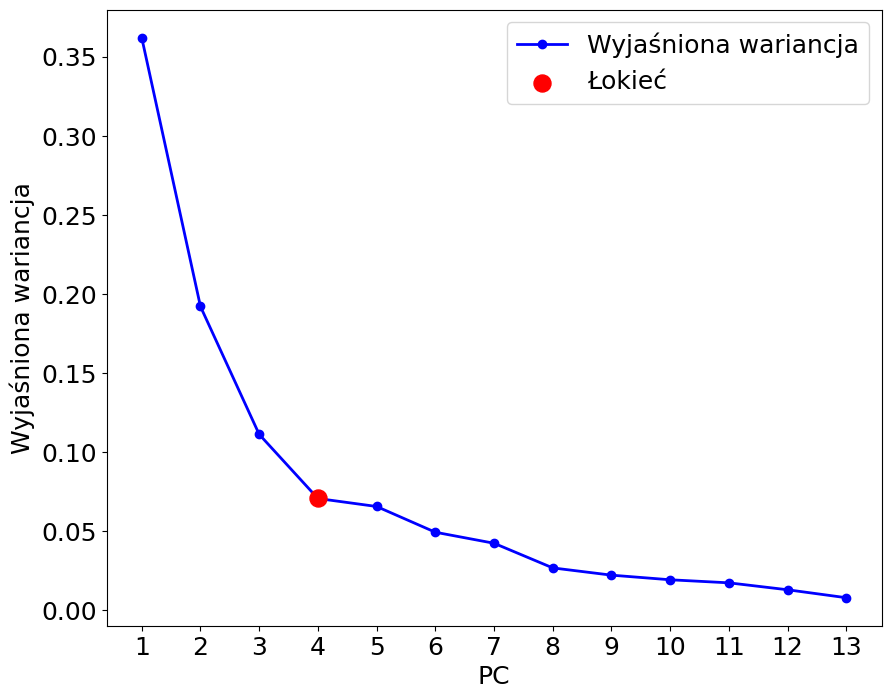

In [23]:
explained_var = pca.explained_variance_ratio_
PCs = np.arange(1, len(explained_var)+1)

plt.figure(figsize=(10,8))
plt.plot(PCs, explained_var, 'o-', linewidth=2, color='blue', label='Wyjaśniona wariancja')
plt.scatter(4, explained_var[3], s=150, marker='o', color='red', zorder=2, label="Łokieć")
plt.xticks(PCs)
plt.legend()
plt.xlabel('PC')
plt.ylabel('Wyjaśniona wariancja')
plt.show()

3.2

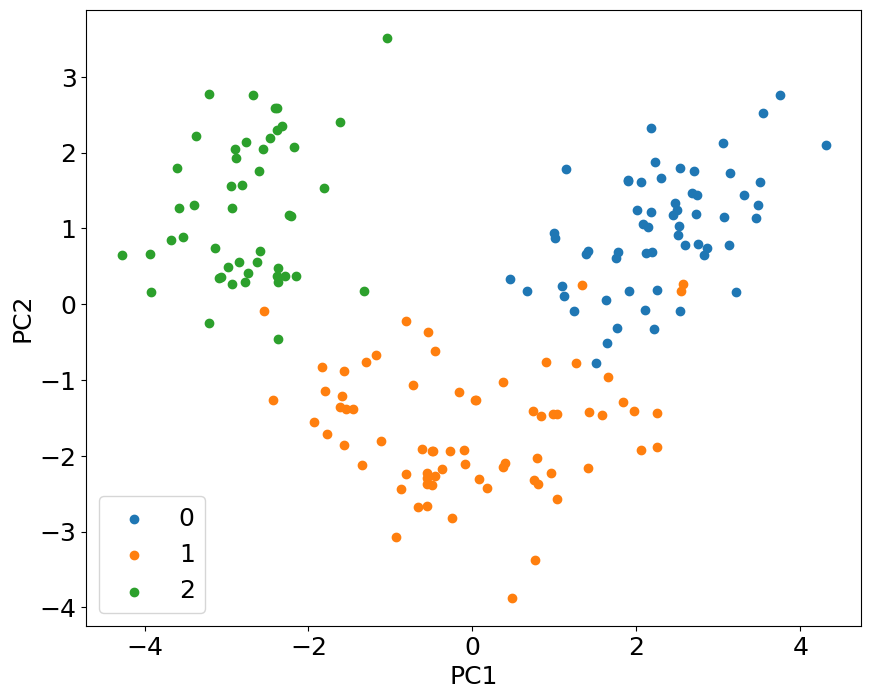

In [24]:
plt.figure(figsize=(10,8))
for label in np.unique(y):
  plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1], label=label)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

3.3

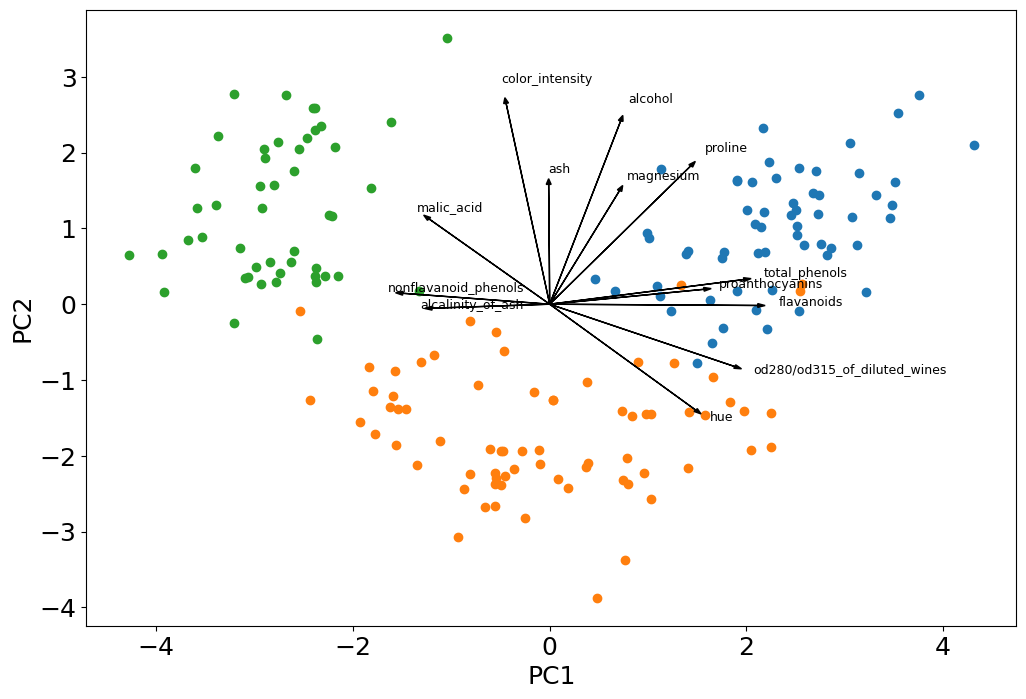

In [28]:
plt.figure(figsize=(12,8))

for label in np.unique(y):
  plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1], label=label)
skala = 5
for i, feature in enumerate(wine.feature_names):
  plt.arrow(0,0,skala*pca.components_[0,i], skala*pca.components_[1,i], color='black', head_width=0.05)
  plt.text(skala*pca.components_[0,i]*1.1, skala*pca.components_[1,i]*1.1, feature, fontsize=9)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

4.1

In [30]:
loadings = pca.components_[:2,:]
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=wine.feature_names)
loadings_df

,PC1,PC2
alcohol,0.144329,0.483652
malic_acid,-0.245188,0.224931
ash,-0.002051,0.316069
alcalinity_of_ash,-0.239320,-0.010591
magnesium,0.141992,0.299634
total_phenols,0.394661,0.065040
flavanoids,0.422934,-0.003360
nonflavanoid_phenols,-0.298533,0.028779
proanthocyanins,0.313429,0.039302
color_intensity,-0.088617,0.529996


4.2

W PC1 dominuje flavanoids (Rodzaj fenoli), a zaraz za tym jest total_phenols (Związki fenolowe).

W PC2 dominuje color_intensity (Głębokość koloru), a zaraz za tym jest alcohol (Zawartość procentowa alkoholu).

W 2D klasy są dobrze separowalne.

In [31]:
pca_bez_std = PCA()
X_pbs = pca_bez_std.fit_transform(X)
loadings_pbs = pd.DataFrame(pca_bez_std.components_[:2,:].T, columns=['PC1', 'PC2'], index=wine.feature_names)
loadings_pbs

,PC1,PC2
alcohol,0.001659,0.001203
malic_acid,-0.000681,0.002155
ash,0.000195,0.004594
alcalinity_of_ash,-0.004671,0.026450
magnesium,0.017868,0.999344
total_phenols,0.000990,0.000878
flavanoids,0.001567,-0.000052
nonflavanoid_phenols,-0.000123,-0.001354
proanthocyanins,0.000601,0.005004
color_intensity,0.002327,0.015100


Bez standaryzacji PC1 dominuje proline, a PC2 magnesium.